In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV,cross_val_score, KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# rmse
def regression_result(y_true,y_pred):
    mse=metrics.mean_squared_error(y_true, y_pred)
    rmse=round(np.sqrt(mse),4)
    return rmse
    
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [3]:
df = pd.read_csv('DataML2.csv')
df['period'] = pd.to_datetime(df['period'], format= '%b-%y')

In [4]:
df.index.name = None

In [5]:
df = df.set_index('period')

In [6]:
df = df.drop(df.index[108])
df

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-0.161290,-5.580645,-31.935484,-19.935484,10.258065,-10.322581,43.199396,33.786565,36.874311,32.240753
2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465


# drop variabel which correlates with gdprl & nan data

In [7]:
#gdprl	csplrl	csprl	cslrl	csgrl	invrl	xgsrl	mgsrl	inhrl	inbrl	retailsales
data = df.drop(columns=['onlinesales', 'onlinetranspr','konsumsiskn', 'IHPRsekunder', 'jalantolgol1', 'inflasipendidikan', 
                        'inflasikesehatan', 'devisa_transpor', 'devisa_travel', 'imporkonstruksi', 'orderbook', 
                        'voltraffgol3', 'voltraffgol5', 'presalesprop', 'voltraffgol4', 'goog_retail', 
                        'goog_groc', 'goog_parks', 'goog_transit', 'goog_work', 'goog_res', 
                        'goog_avg', 'IPBK', 'IPAMM', 'ITP', 'IIK', 'gdprl','csplrl',
                       'csprl','cslrl','csgrl','invrl','xgsrl','mgsrl','inbrl','retailsales'])
data

,inhrl,sukucadang,manminrok,bbm,gadget,perlengkapanrt,barangbudaya,baranglain,barangsandang,mobilsales,...,rtgs,prod_motor,ekspor_nm_rl,impor_nm_rl,ekspor_nm_pi,impor_nm_pi,ekspor_mg_nl,impor_mg_nl,sup_valas_jl,sup_valas_bl
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,5.456052,95.462254,116.436824,102.782781,125.647975,131.069978,97.748775,111.269651,122.355941,76427,...,1140089.390,76188,10723.58466,12242.559210,114.919980,93.455990,3142.633968,3019.327583,22442499.63,24912810.16
2012-02-01,5.456052,86.876906,108.690942,97.354248,125.245195,130.186828,101.825121,102.109056,110.749180,86486,...,1156648.290,85747,10887.07557,12490.456360,114.851202,94.569651,3355.479572,3492.652399,21664503.45,23836369.39
2012-03-01,5.456052,93.026262,116.452079,101.673305,120.550990,130.424904,105.193351,106.808437,114.664600,87917,...,1206328.900,85097,11523.35706,12946.806280,116.810881,94.238671,3486.095481,4008.890181,20912505.05,22648459.89
2012-04-01,6.618118,86.914016,114.365660,102.643388,118.729045,131.977762,102.909736,105.629696,112.962527,87144,...,1172728.360,83721,10792.98152,12948.428110,116.763896,94.778955,3560.730493,4120.395283,20284957.19,20772381.34
2012-05-01,6.618118,93.110160,117.775489,96.640337,115.126069,137.719549,103.730032,114.997415,123.943550,95541,...,1346689.120,90869,11388.35403,14052.304160,116.015932,94.502227,3724.886311,3442.100000,21893002.43,26047380.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-5.600000,118.228910,238.195283,65.447093,250.935422,138.497428,66.966929,79.522759,62.685797,37277,...,2026929.250,29584,10521.42765,9794.608347,118.571234,100.441673,598.700000,949.800000,24880135.45,23809095.74
2020-09-01,-5.600000,118.658436,235.330999,67.500583,241.236428,135.682770,64.429920,79.261946,64.796720,48554,...,2346047.680,59573,11142.52793,10292.517290,119.598267,101.134059,668.400000,1173.000000,26695283.37,26237659.74
2020-10-01,-6.633814,118.706834,222.743949,71.029015,212.706197,132.480744,65.040389,77.731932,66.348474,49018,...,2163810.000,66378,11447.17000,9458.295633,120.325798,102.814970,613.400000,1078.800000,24700714.17,23894242.42


# selecting top 15 that correlates with inhrl

In [125]:
corr = data.corr()

In [126]:
corr['inhrl'].sort_values(ascending=False).head(16)

inhrl             1.000000
IKE               0.827036
mobilsales        0.740515
IKK               0.692888
motorsales        0.661030
barangbudaya      0.647037
prod_motor        0.579332
JobVacancy        0.574587
barangsandang     0.567459
impor_mg_nl       0.538919
bbm               0.507272
ekspor_mg_nl      0.496231
pmi               0.474031
baranglain        0.422888
wagetukang        0.359594
salesalatberat    0.346070
Name: inhrl, dtype: float64

In [8]:
data = data[['inhrl','IKE','mobilsales','IKK','motorsales','barangbudaya','prod_motor','JobVacancy',
             'barangsandang','impor_mg_nl','bbm','ekspor_mg_nl','pmi','baranglain','wagetukang','salesalatberat']]
data

,inhrl,IKE,mobilsales,IKK,motorsales,barangbudaya,prod_motor,JobVacancy,barangsandang,impor_mg_nl,bbm,ekspor_mg_nl,pmi,baranglain,wagetukang,salesalatberat
period,,,,,,,,,,,,,,,,
2012-01-01,5.456052,110.900000,76427,119.200000,645863,97.748775,76188,88.262366,122.355941,3019.327583,102.782781,3142.633968,48.49,111.269651,65084.11167,617.0
2012-02-01,5.456052,103.500000,86486,111.700000,666136,101.825121,85747,100.000000,110.749180,3492.652399,97.354248,3355.479572,50.63,102.109056,65282.00481,769.0
2012-03-01,5.456052,102.400000,87917,107.300000,619678,105.193351,85097,106.761206,114.664600,4008.890181,101.673305,3486.095481,50.82,106.808437,65306.07290,821.0
2012-04-01,6.618118,97.600000,87144,102.500000,617508,102.909736,83721,98.364888,112.962527,4120.395283,102.643388,3560.730493,50.46,105.629696,65276.65635,749.0
2012-05-01,6.618118,103.800000,95541,109.000000,611251,103.730032,90869,100.007483,123.943550,3442.100000,96.640337,3724.886311,48.04,114.997415,65923.82040,773.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-5.600000,55.599832,37277,86.899667,317107,66.966929,29584,40.063983,62.685797,949.800000,65.447093,598.700000,50.80,79.522759,64060.63614,105.0
2020-09-01,-5.600000,54.135689,48554,83.357487,380713,64.429920,59573,38.430742,64.796720,1173.000000,67.500583,668.400000,47.20,79.261946,64720.46069,148.0
2020-10-01,-6.633814,51.463568,49018,79.018127,317830,65.040389,66378,36.602933,66.348474,1078.800000,71.029015,613.400000,47.80,77.731932,64688.10046,154.0


In [9]:
data = data[data.columns].pct_change(periods=12)

In [10]:
data = data.dropna()

In [11]:
scaler = StandardScaler()
scaler = scaler.fit_transform(data.values)
scaler

array([[ 0.99777861,  0.10295303,  1.41918678, ...,  0.16741069,
         3.08812826, -0.60277492],
       [ 0.99777861,  0.5954761 ,  1.11519373, ...,  0.46624085,
         3.21815621, -0.84976944],
       [ 0.99777861,  0.64017193,  0.669182  , ...,  0.45518942,
         2.97475349, -0.82340501],
       ...,
       [-2.92605533, -2.78368447, -1.84594154, ..., -1.92367518,
         0.31211348, -0.08823441],
       [-2.92605533, -2.4324407 , -1.49963224, ..., -1.84581313,
         0.26751016,  0.53349737],
       [-2.92605533, -2.09620135, -1.23307546, ..., -1.97651841,
         0.17892592,  1.29289066]])

In [12]:
data = pd.DataFrame(scaler, columns = data.columns, index = data.index)
data

,inhrl,IKE,mobilsales,IKK,motorsales,barangbudaya,prod_motor,JobVacancy,barangsandang,impor_mg_nl,bbm,ekspor_mg_nl,pmi,baranglain,wagetukang,salesalatberat
period,,,,,,,,,,,,,,,,
2013-01-01,0.997779,0.102953,1.419187,-0.063848,0.235397,-0.051647,1.227653,-0.166766,0.195007,1.183553,0.368050,-0.066060,0.464206,0.167411,3.088128,-0.602775
2013-02-01,0.997779,0.595476,1.115194,0.544019,0.125787,-0.231479,0.783552,-0.129194,0.569231,0.361057,0.624301,-0.407720,0.132738,0.466241,3.218156,-0.849769
2013-03-01,0.997779,0.640172,0.669182,0.917879,0.551725,0.117088,0.298724,-0.042299,0.597886,0.150503,0.689549,-0.085106,0.299057,0.455189,2.974753,-0.823405
2013-04-01,0.622333,0.726183,1.020624,1.068358,0.521472,0.336245,0.944538,0.414981,0.943891,-0.131304,0.645342,-0.737938,0.477220,0.688195,3.117712,-0.715618
2013-05-01,0.622333,0.500877,0.459309,0.450387,0.469742,0.618808,0.524180,0.807106,0.966687,0.225018,1.030372,-0.319690,1.074558,0.657126,2.831189,-0.882805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-2.797895,-2.706880,-2.271070,-2.388964,-1.787847,-2.138736,-2.909913,-1.816178,-2.329128,-1.037770,-1.273679,-0.644468,0.623337,-2.034639,0.014464,-1.029924
2020-09-01,-2.797895,-2.710334,-1.797601,-2.574857,-1.195872,-2.215001,-1.930997,-1.795140,-2.139101,-0.568792,-0.961698,-0.117923,-0.313539,-1.863518,0.323950,-0.514859
2020-10-01,-2.926055,-2.783684,-1.845942,-2.719833,-1.786817,-2.276084,-1.742338,-1.864518,-2.078501,-0.940303,-0.868581,-0.820029,0.193120,-1.923675,0.312113,-0.088234


In [13]:
data = data.fillna(method = 'pad')
data

,inhrl,IKE,mobilsales,IKK,motorsales,barangbudaya,prod_motor,JobVacancy,barangsandang,impor_mg_nl,bbm,ekspor_mg_nl,pmi,baranglain,wagetukang,salesalatberat
period,,,,,,,,,,,,,,,,
2013-01-01,0.997779,0.102953,1.419187,-0.063848,0.235397,-0.051647,1.227653,-0.166766,0.195007,1.183553,0.368050,-0.066060,0.464206,0.167411,3.088128,-0.602775
2013-02-01,0.997779,0.595476,1.115194,0.544019,0.125787,-0.231479,0.783552,-0.129194,0.569231,0.361057,0.624301,-0.407720,0.132738,0.466241,3.218156,-0.849769
2013-03-01,0.997779,0.640172,0.669182,0.917879,0.551725,0.117088,0.298724,-0.042299,0.597886,0.150503,0.689549,-0.085106,0.299057,0.455189,2.974753,-0.823405
2013-04-01,0.622333,0.726183,1.020624,1.068358,0.521472,0.336245,0.944538,0.414981,0.943891,-0.131304,0.645342,-0.737938,0.477220,0.688195,3.117712,-0.715618
2013-05-01,0.622333,0.500877,0.459309,0.450387,0.469742,0.618808,0.524180,0.807106,0.966687,0.225018,1.030372,-0.319690,1.074558,0.657126,2.831189,-0.882805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-2.797895,-2.706880,-2.271070,-2.388964,-1.787847,-2.138736,-2.909913,-1.816178,-2.329128,-1.037770,-1.273679,-0.644468,0.623337,-2.034639,0.014464,-1.029924
2020-09-01,-2.797895,-2.710334,-1.797601,-2.574857,-1.195872,-2.215001,-1.930997,-1.795140,-2.139101,-0.568792,-0.961698,-0.117923,-0.313539,-1.863518,0.323950,-0.514859
2020-10-01,-2.926055,-2.783684,-1.845942,-2.719833,-1.786817,-2.276084,-1.742338,-1.864518,-2.078501,-0.940303,-0.868581,-0.820029,0.193120,-1.923675,0.312113,-0.088234


Text(0.5, 1.0, 'inhrl')

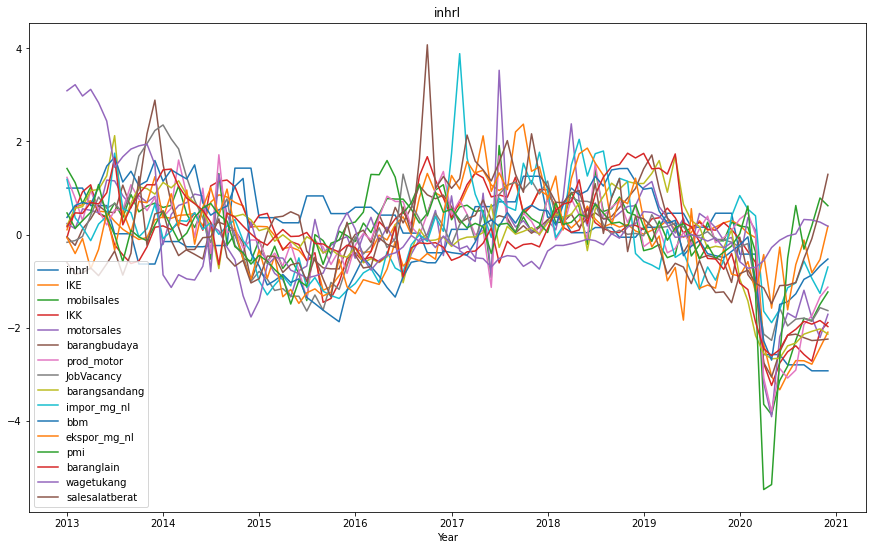

In [14]:
fig, ax = plt.subplots(figsize = (15,9))
col = data.columns
for i in data.columns:
    ax.plot(data[i],label=i)
ax.legend()
ax.set_xlabel('Year')
ax.set_title('inhrl')

In [15]:
x_train = data[:'2020-06-01'].drop(['inhrl'], axis = 1)
y_train = data.loc[:'2020-06-01', 'inhrl']
x_test = data['2020-07-01':'2020-12-01'].drop(['inhrl'], axis = 1)
y_test = data.loc['2020-07-01':'2020-12-01', 'inhrl']

In [16]:
trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = trans.fit_transform(x_train)
x_test_poly = trans.fit_transform(x_test)

In [17]:
column_xtrain = trans.get_feature_names(x_train.columns)
column_xtest = trans.get_feature_names(x_test.columns)

In [18]:
x_train_model = pd.DataFrame(x_train_poly, columns = column_xtrain, index = x_train.index)
x_test_model = pd.DataFrame(x_test_poly, columns = column_xtest, index = x_test.index)

In [19]:
tscv = TimeSeriesSplit(n_splits=11)

# ElasticNet

In [86]:
parameter_elastic={
    'elastic__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9],
    'elastic__l1_ratio':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'elastic__tol':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
}

In [87]:
pipe_elastic = Pipeline([('elastic', ElasticNet())])

In [88]:
grid_search_elastic = GridSearchCV(pipe_elastic, parameter_elastic, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_elastic.fit(x_train, y_train)
best_score_elastic = grid_search_elastic.best_score_
best_model_elastic = grid_search_elastic.best_estimator_

In [89]:
best_score_elastic

-0.5452392111859949

In [90]:
best_model_elastic

Pipeline(steps=[('elastic', ElasticNet(alpha=7, l1_ratio=0.01, tol=0.3))])

rmse training =  0.44940934461955956 
rmse testing =  2.2856326914654486


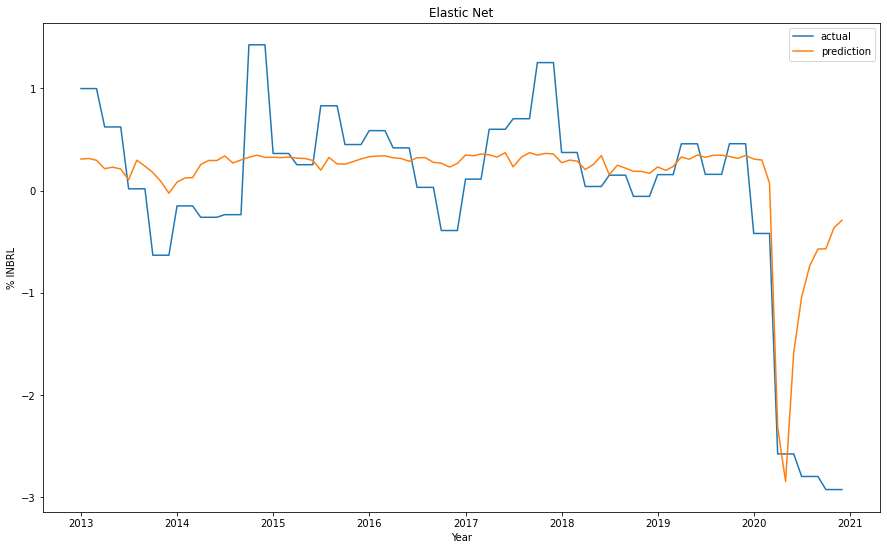

In [20]:
elnet = ElasticNet(alpha=7, l1_ratio=0.01, tol=0.3)
elnet_train = elnet.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_elnet = np.concatenate((elnet_train.predict(x_train_model),elnet_train.predict(x_test_model)))
yact_elnet = np.concatenate((y_train.values, y_test.values))

# plotting
df_elnet = pd.DataFrame(
    {'period': data.index, 'actual': yact_elnet, 'prediction': ypred_elnet})
df_elnet.index = df_elnet['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_elnet['actual'],label='actual')
ax.plot(df_elnet['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INBRL')
ax.set_title('Elastic Net')

#rmse
rmse_elnet_train = rmse(elnet_train.predict(x_train_model), y_train.values)
rmse_elnet_test = rmse(elnet_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_elnet_train, 
      '\nrmse testing = ',
      rmse_elnet_test)

# SVR

In [92]:
parameter_svr = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree' : [x for x in range(0,5)],
    'svr__gamma' : ['scale', 'auto']
}
pipe_svr = Pipeline([('svr', SVR())])

In [93]:
grid_search_svr = GridSearchCV(pipe_svr, parameter_svr, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_svr.fit(x_train, y_train)
best_score_svr = grid_search_svr.best_score_
best_model_svr = grid_search_svr.best_estimator_

In [94]:
best_score_svr

-0.4804545986406366

In [95]:
best_model_svr

Pipeline(steps=[('svr', SVR(degree=2, gamma='auto', kernel='poly'))])

In [21]:
# model running
svm = SVR(degree=2, gamma='auto', kernel='poly')
svm_train = svm.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_svm = np.concatenate((svm_train.predict(x_train_model),svm_train.predict(x_test_model)))
yact_svm = np.concatenate((y_train.values, y_test.values))

rmse training =  0.3115569746751085 
rmse testing =  2.5420149582242626


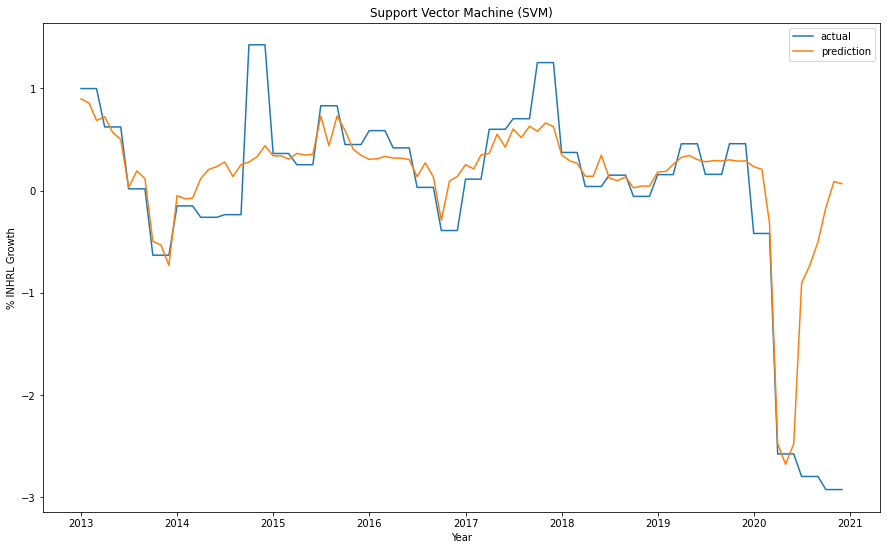

In [22]:
df_svm = pd.DataFrame(
    {'period': data.index, 'actual': yact_svm, 'prediction': ypred_svm})
df_svm.index = df_svm['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_svm['actual'],label='actual')
ax.plot(df_svm['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('Support Vector Machine (SVM)')

#rmse
rmse_svm_train = rmse(svm_train.predict(x_train_model), y_train.values)
rmse_svm_test = rmse(svm_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_svm_train, 
      '\nrmse testing = ',
      rmse_svm_test)

# XGboost

In [41]:
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
parameter_xgb = {
    "xgb__eta" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    'xgb__min_child_weight':[1,2,3,4,5], 
    'xgb__gamma':[i/10.0 for i in range(3,6)], 
    'xgb__subsample':[i/10.0 for i in range(6,11)], #sampling baris
    'xgb__colsample_bytree':[i/10.0 for i in range(6,11)],  
    'xgb__max_depth': max_depth,}

In [42]:
xgb = XGBRegressor()
pipe_xgb = Pipeline([('xgb', xgb)])

In [43]:
grid_search_xgb = GridSearchCV(pipe_xgb, parameter_xgb, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_xgb.fit(x_train, y_train)
best_score_xgb = grid_search_xgb.best_score_
best_model_xgb = grid_search_xgb.best_estimator_

In [46]:
best_score_xgb

-0.5666486471851776

In [47]:
best_model_xgb

Pipeline(steps=[('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.9, eta=0.3, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=100, min_child_weight=5, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.7, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [23]:
xg = XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.9, eta=0.3, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=100, min_child_weight=5,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.7, tree_method='exact',
                              validate_parameters=1, verbosity=None)
xg_train = xg.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_xg = np.concatenate((xg_train.predict(x_train_model),xg_train.predict(x_test_model)))
yact_xg = np.concatenate((y_train.values, y_test.values))

rmse training =  0.13980589261268947 
rmse testing =  1.0720915099434396


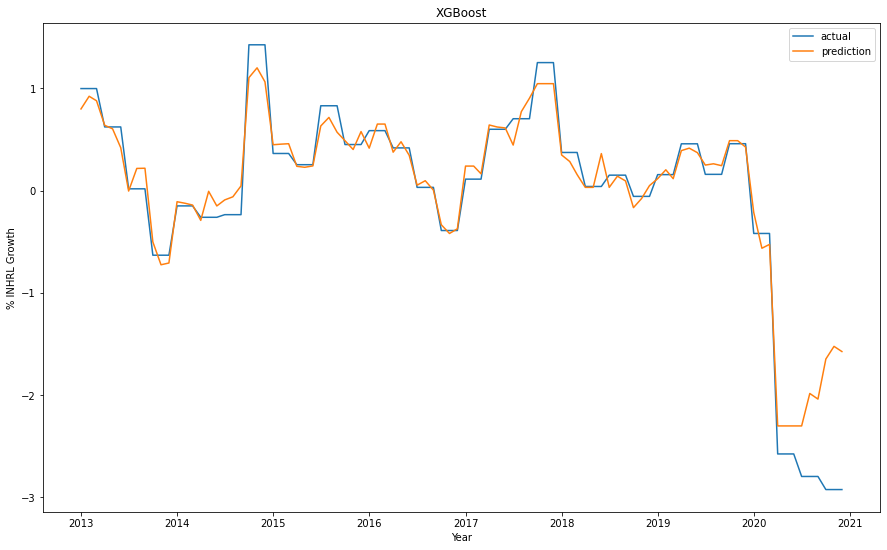

In [24]:
df_xg = pd.DataFrame(
    {'period': data.index, 'actual': yact_xg, 'prediction': ypred_xg})
df_xg.index = df_xg['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_xg['actual'],label='actual')
ax.plot(df_xg['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('XGBoost')

#rmse
rmse_xg_train = rmse(xg_train.predict(x_train_model), y_train.values)
rmse_xg_test = rmse(xg_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_xg_train, 
      '\nrmse testing = ',
      rmse_xg_test)

# RF

In [44]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
parameter_rfr = {
    'rfr__n_estimators': n_estimators,
    'rfr__max_features': max_features,
    'rfr__max_depth': max_depth
}

In [45]:
pipe_rfr = Pipeline([('rfr', RandomForestRegressor())])
grid_search_rfr = GridSearchCV(pipe_rfr, parameter_rfr, cv=tscv, n_jobs=1, scoring=rmse_score)
grid_search_rfr.fit(x_train, y_train)
best_score_rfr = grid_search_rfr.best_score_
best_model_rfr = grid_search_rfr.best_estimator_

In [50]:
best_score_rfr

-0.5559700614863996

In [51]:
best_model_rfr

Pipeline(steps=[('rfr',
                 RandomForestRegressor(max_depth=380, max_features='sqrt',
                                       n_estimators=800))])

In [25]:
# model running
rf = RandomForestRegressor(max_depth=380, max_features='sqrt',
                                       n_estimators=800)
rf_train = rf.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_rf = np.concatenate((rf_train.predict(x_train_model),rf_train.predict(x_test_model)))
yact_rf = np.concatenate((y_train.values, y_test.values))

rmse training =  0.14400979560588995 
rmse testing =  2.285991448569516


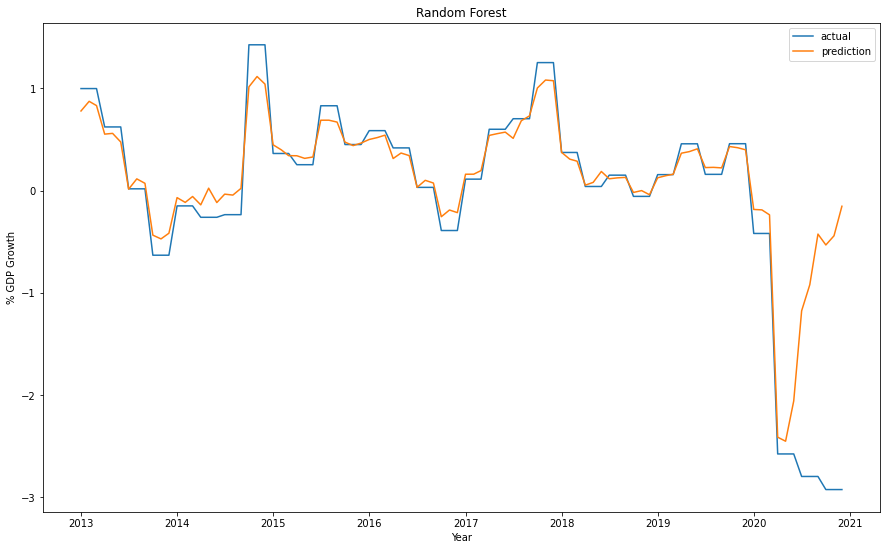

In [26]:
# plotting
df_rf = pd.DataFrame(
    {'period': data.index, 'actual': yact_rf, 'prediction': ypred_rf})
df_rf.index = df_rf['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_rf['actual'],label='actual')
ax.plot(df_rf['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% GDP Growth')
ax.set_title('Random Forest')

#rmse
rmse_rf_train = rmse(rf_train.predict(x_train_model), y_train.values)
rmse_rf_test = rmse(rf_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_rf_train, 
      '\nrmse testing = ',
      rmse_rf_test)

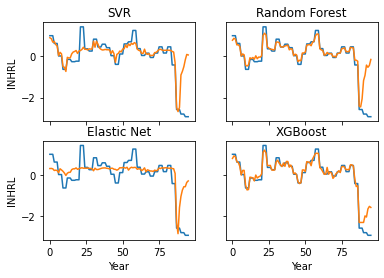

In [27]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(yact_svm)
axs[0, 0].plot(ypred_svm)
axs[0, 0].set_title('SVR')
axs[0, 1].plot(yact_rf)
axs[0, 1].plot(ypred_rf)
axs[0, 1].set_title('Random Forest')
axs[1, 0].plot(yact_elnet)
axs[1, 0].plot(ypred_elnet)
axs[1, 0].set_title('Elastic Net')
axs[1, 1].plot(yact_xg)
axs[1, 1].plot(ypred_xg)
axs[1, 1].set_title('XGBoost')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='INHRL')
    
for ax in axs.flat:
    ax.label_outer()